In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Load Data
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
submit = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
# Data Preprocessing
def preprocess(df):
    df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
    df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
    df['Embarked'].fillna('S', inplace=True)
    df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    return df

train_data = preprocess(train)
test_data = preprocess(test)
y = train['Survived'].values
X_train, X_val, y_train, y_val = train_test_split(train_data, y, test_size=0.2, random_state=42)

In [5]:
# Normalize
def normalize(X_train, X_val, test_data):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    test_data = scaler.transform(test_data)
    return X_train, X_val, test_data

X_train, X_val, test_data = normalize(X_train, X_val, test_data)

In [6]:
!pip install -qU oikan

Epoch 1/100, Loss: 0.7069923877716064
Epoch 2/100, Loss: 0.6466118693351746
Epoch 3/100, Loss: 0.6090026497840881
Epoch 4/100, Loss: 0.5767247676849365
Epoch 5/100, Loss: 0.5483376383781433
Epoch 6/100, Loss: 0.5233283638954163
Epoch 7/100, Loss: 0.5035041570663452
Epoch 8/100, Loss: 0.4872019588947296
Epoch 9/100, Loss: 0.47377222776412964
Epoch 10/100, Loss: 0.46220073103904724
Epoch 11/100, Loss: 0.4535139203071594
Epoch 12/100, Loss: 0.4478621780872345
Epoch 13/100, Loss: 0.4461752772331238
Epoch 14/100, Loss: 0.4474969506263733
Epoch 15/100, Loss: 0.4498952329158783
Epoch 16/100, Loss: 0.4515303373336792
Epoch 17/100, Loss: 0.451177716255188
Epoch 18/100, Loss: 0.44911450147628784
Epoch 19/100, Loss: 0.4457602798938751
Epoch 20/100, Loss: 0.4422982931137085
Epoch 21/100, Loss: 0.4392262101173401
Epoch 22/100, Loss: 0.4369310140609741
Epoch 23/100, Loss: 0.4357450604438782
Epoch 24/100, Loss: 0.4352026581764221
Epoch 25/100, Loss: 0.43483489751815796
Epoch 26/100, Loss: 0.434512495

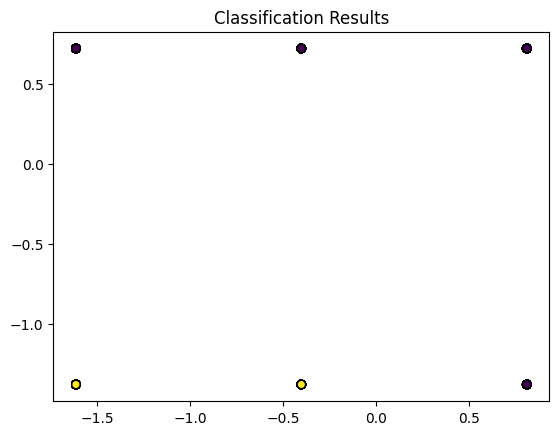

OIKAN Extracted Symbolic Formula: 0.698256194591522*x0 - 0.279470533132553*x1 + 0.340953201055527*x2 - 0.0991314202547073*x3 - 0.220621466636658*x4 + 0.442492097616196*x5 - 0.515061378479004*x6 + 0.112484


In [7]:
# OIKAN Model Training
from oikan.model import OIKAN
from oikan.trainer import train_classification
from oikan.visualize import visualize_classification
from oikan.symbolic import extract_symbolic_formula_classification

oikan_model = OIKAN(input_dim=X_train.shape[1], output_dim=2)
train_classification(oikan_model, (torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)), epochs=100, lr=0.01)
visualize_classification(oikan_model, X_train, y_train)
symbolic_formula = extract_symbolic_formula_classification(oikan_model, X_train)
print("OIKAN Extracted Symbolic Formula:", symbolic_formula)

In [8]:
!pip install -qU pykan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 2.7 MB/s eta 0:00:00


In [9]:
# PyKAN Model Training

from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_kan = KAN(width=[X_train.shape[1], 10, 5, 1], grid=3, k=3, seed=42, device=device)
model_kan.fit({'train_input': torch.tensor(X_train, dtype=torch.float32, device=device),
               'train_label': torch.tensor(y_train, dtype=torch.float32, device=device).view(-1, 1),
               'test_input': torch.tensor(X_val, dtype=torch.float32, device=device),
               'test_label': torch.tensor(y_val, dtype=torch.float32, device=device).view(-1, 1)},
              opt="LBFGS", steps=100, lamb=0.001)
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model_kan.auto_symbolic(lib = lib)
from kan.utils import ex_round
final_formula = ex_round(model_kan.symbolic_formula()[0][0], 4)
print("PyKAN Extracted Symbolic Formula:", final_formula)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.75e-01 | test_loss: 3.97e-01 | reg: 1.85e+01 | : 100%|█| 100/100 [00:42<00:00,  2.36


saving model version 0.1
fixing (0,0,0) with x^2, r2=1.0000015497207642, c=2
fixing (0,0,1) with x^2, r2=1.0000016689300537, c=2
fixing (0,0,2) with x^2, r2=1.0000014305114746, c=2
fixing (0,0,3) with x^2, r2=1.0000016689300537, c=2
fixing (0,0,4) with x^2, r2=1.0000015497207642, c=2
fixing (0,0,5) with x^2, r2=1.0000011920928955, c=2
fixing (0,0,6) with x^2, r2=1.0000015497207642, c=2
fixing (0,0,7) with x^2, r2=1.0000014305114746, c=2
fixing (0,0,8) with x^2, r2=1.000001311302185, c=2
fixing (0,0,9) with x^2, r2=1.000001311302185, c=2
fixing (0,1,0) with x, r2=1.0000014305114746, c=1
fixing (0,1,1) with exp, r2=1.0000016689300537, c=2
fixing (0,1,2) with x, r2=1.0000015497207642, c=1
fixing (0,1,3) with x, r2=1.0000016689300537, c=1
fixing (0,1,4) with x, r2=1.0000016689300537, c=1
fixing (0,1,5) with x, r2=1.0000014305114746, c=1
fixing (0,1,6) with x, r2=0.9999944567680359, c=1
fixing (0,1,7) with x, r2=0.9999938607215881, c=1
fixing (0,1,8) with x, r2=1.0000015497207642, c=1
fixin

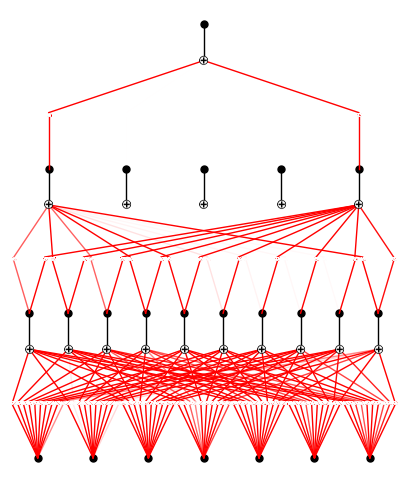

In [10]:
# Visualize KAN
model_kan.plot(beta=100)

In [11]:
# MLP Model Training
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

mlp_model = MLPClassifier(input_dim=X_train.shape[1], hidden_dim=10, output_dim=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.01)

def train_mlp(model, X_train, y_train, epochs=100):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(torch.tensor(X_train, dtype=torch.float32))
        loss = criterion(outputs, torch.tensor(y_train, dtype=torch.long))
        loss.backward()
        optimizer.step()
    print("MLP Training Complete")

train_mlp(mlp_model, X_train, y_train, epochs=100)

MLP Training Complete


In [12]:
# Model Comparison
from sklearn.metrics import accuracy_score

# Model Evaluation
def evaluate_model(model, X, y):
    with torch.no_grad():
        predictions = model(torch.tensor(X, dtype=torch.float32))
        predicted_labels = torch.argmax(predictions, axis=1).numpy()
    return accuracy_score(y, predicted_labels)

def evaluate_pykan(model, X_val, y_val):
    with torch.no_grad():
        pykan_preds = model(torch.tensor(X_val, dtype=torch.float32, device=device)).cpu().numpy()
        pykan_preds = (pykan_preds > 0.5).astype(int).flatten()
    return accuracy_score(y_val, pykan_preds)

oikan_acc = evaluate_model(oikan_model, X_val, y_val)
mlp_acc = evaluate_model(mlp_model, X_val, y_val)
pykan_acc = evaluate_pykan(model_kan, X_val, y_val)

print(f"OIKAN Accuracy: {oikan_acc:.4f}")
print(f"MLP Accuracy: {mlp_acc:.4f}")
print(f"PyKAN Accuracy: {pykan_acc:.4f}")

OIKAN Accuracy: 0.8101
MLP Accuracy: 0.8156
PyKAN Accuracy: 0.7989


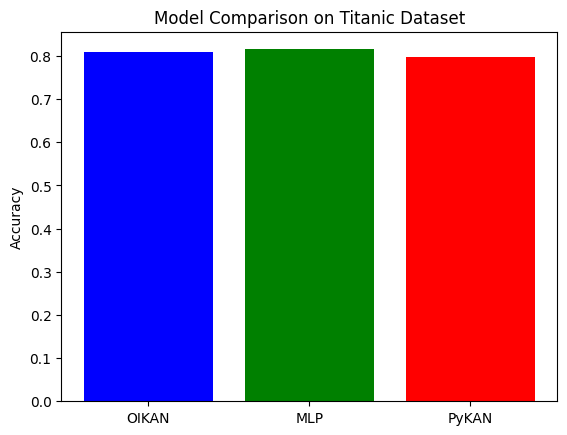

In [13]:
# Visualization
plt.bar(['OIKAN', 'MLP', 'PyKAN'], [oikan_acc, mlp_acc, pykan_acc], color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Comparison on Titanic Dataset')
plt.show()

In [14]:
# Predictions
test_preds = oikan_model(torch.tensor(test_data, dtype=torch.float32))
test_preds = torch.argmax(test_preds, axis=1).numpy()

submission = pd.DataFrame({'PassengerId': submit['PassengerId'], 'Survived': test_preds})

In [15]:
# Submission
submission.to_csv('oikan_submission.csv', index=False)